In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/read fda file'

/content/drive/MyDrive/read fda file


In [ ]:
pip install oct-converter

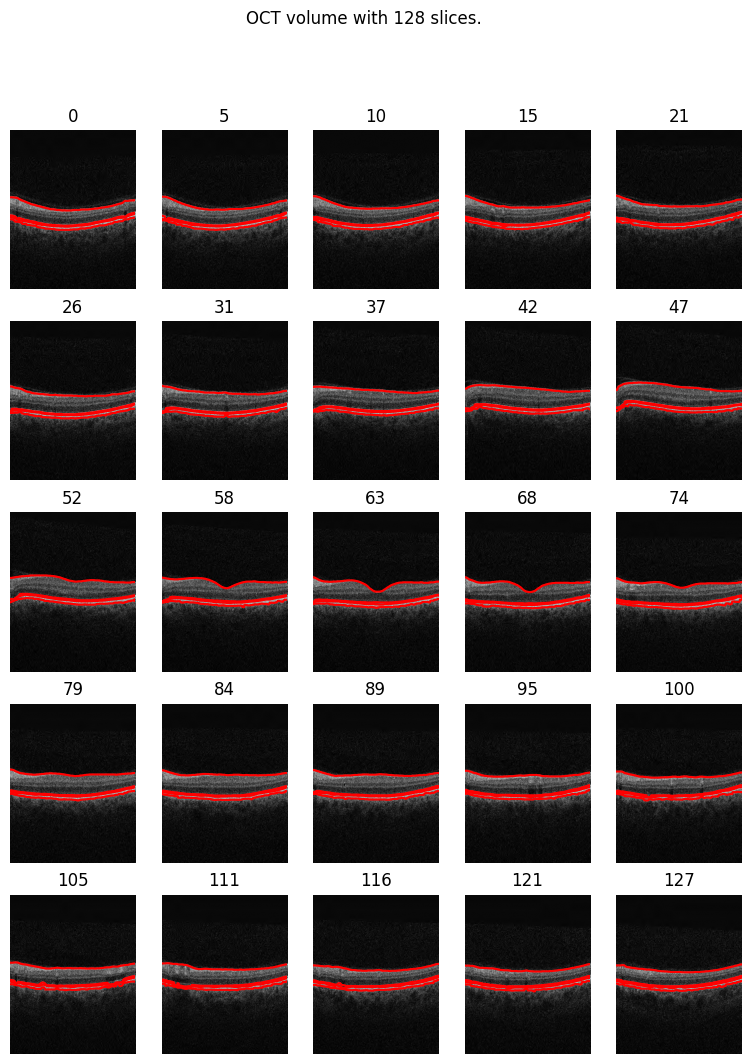

b'@SCAN_POS_COMP_DATA' there is no method for getting info from this chunk.


@IMG_TRC_02 is not in chunk list, skipping.


[PosixPath('/content/drive/MyDrive/read fda file/4111211_21011_0_0.dcm'),
 PosixPath('/content/drive/MyDrive/read fda file/4111211_21011_0_0_fundus.dcm')]

In [49]:
import json
from oct_converter.readers import FDA
from oct_converter.dicom import create_dicom_from_oct

fds = FDA("example.fda")

oct_volume = fds.read_oct_volume()
oct_volume.peek(show_contours=True)

# oct_volume.save("oct.avi")
# oct_volume.save("oct.png")
# oct_volume.save_projection("projection.png")

fundus = fds.read_fundus_image()
# fundus.save("fundus.jpg")

metadata = fds.read_all_metadata(verbose=True)
with open("metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)

create_dicom_from_oct("example.fda")


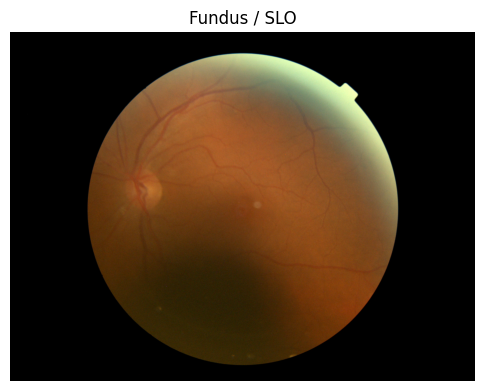

In [ ]:
# Show fundus
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
plt.imshow(fundus.image, cmap="gray")
plt.title("Fundus / SLO")
plt.axis("off")
plt.show()


In [ ]:
import numpy as np

def print_oct_summary(fundus, oct_volume):

    print("\n" + "=" * 60)
    print("FUNDUS / SLO IMAGE")
    print("=" * 60)

    fundus_img = fundus.image
    print(f"Image size        : {fundus_img.shape}")
    print(f"Data type         : {fundus_img.dtype}")

    print("\n" + "=" * 60)
    print("OCT VOLUME")
    print("=" * 60)

    vol = oct_volume.volume  # NumPy array: (B, H, W)
    print(f"Volume shape      : {vol.shape}")
    print(f"Number of B-scans : {oct_volume.num_slices}")
    print(f"B-scan size       : {vol.shape[1:]}")

    print(f"Laterality        : {oct_volume.laterality}")
    print(f"Acquisition date  : {oct_volume.acquisition_date}")
    print(f"Volume ID         : {oct_volume.volume_id}")

    print(f"Pixel spacing     : {oct_volume.pixel_spacing}")

    print("\n" + "=" * 60)
    print("OCT PATIENT FIELDS (FROM OCT OBJECT)")
    print("=" * 60)

    print(f"Patient ID        : {oct_volume.patient_id}")
    print(f"First name        : {oct_volume.first_name}")
    print(f"Surname           : {oct_volume.surname}")
    print(f"Sex               : {oct_volume.sex}")
    print(f"DOB               : {oct_volume.DOB}")

    print("=" * 60)

print_oct_summary(fundus, oct_volume)


FUNDUS / SLO IMAGE
Image size        : (1536, 2048, 3)
Data type         : uint8

OCT VOLUME
Volume shape      : (128, 650, 512)
Number of B-scans : 128
B-scan size       : (650, 512)
Laterality        : L
Acquisition date  : 2010-06-28 10:59:51
Volume ID         : None
Pixel spacing     : [0.01171875, 0.046875, 0.0035]

OCT PATIENT FIELDS (FROM OCT OBJECT)
Patient ID        : 1
First name        : 
Surname           : 1
Sex               : O
DOB               : None
